## **Why do we need clustering in a business domain ?**

Many of today’s most prominent companies rely on machine learning algorithms to help better understand their customers and revenue opportunities. There are hundreds of different machine learning algorithms, so even learning the basics can feel like a daunting task.

Seven most common machine learning applications for businesses:
- customer lifetime value modeling 
- churn modeling
- dynamic pricing 
- customer segmentation 
- image classification and detection
- recommendation engines
- anomaly or fraud detection 

A brief discussion on each of these can be found [here ](https://www.datascience.com/blog/common-machine-learning-business-applications)

This notebook just deals with an application of one important and useful **clustering** technique for **customer segmentation.** First let us understand what **customer segmentation** is briefly.

### Customer Segmentaion

Through out our young age, we are taught that human diversity — be it gender, nationality, skill set, or even food preferences — is a quality to be embraced. While this is true in our day-to-day lives, from a business perspective, treating everyone as an individual is very impractical, if not impossible (but the whole business community working on it)!

This is the driving force for market segmentation. While you cannot easily serve your customers on an individual level just yet, you can do the next best thing — uncover the similarities and differences between them, package them into neat small subgroups, and serve the needs of those groups. This can at least give your customers a sense that you are speaking to them as an individual, even if ten thousand of your other customers received, say, the same discount coupon in their email.

**How do you segment your market?**

!["ALT TEXT"](demografia-blog.jpg "market segmentation")



  Typically, one of the first approaches is by K-means clustering. (For the sake of brevity, I'll assume the reader has an understanding of how K-means works. If not, check out my other notebook on K-means clustering.) K-means is one of, if not the only, data clustering technique taught in statistics classes, so it only makes sense that business analysts would jump to it if a project necessitated market segmentation. K-means is, after all, fairly easy to understand and very efficient with large data sets you might see in a big data solution environment. But like all statistical methods, K-means clustering has some underlying assumptions and if those assumptions turns out to be true, well you and your K-means are the winners.

### Think out of the "Sphere"

Real-life data is almost always not easy to work with because of its messiness. The examples and illustrations we see in our statistics courses are designed to reflect ideal situations that sadly almost never occur in the real world. When the K-means algorithm is run on a set of data, it's attempting to minimize the within-cluster variance with respect to the nearest centroid for how ever many centroids/clusters you told it to find a priori. This works best when your data is roughly "spherical," as in the toy data set below:

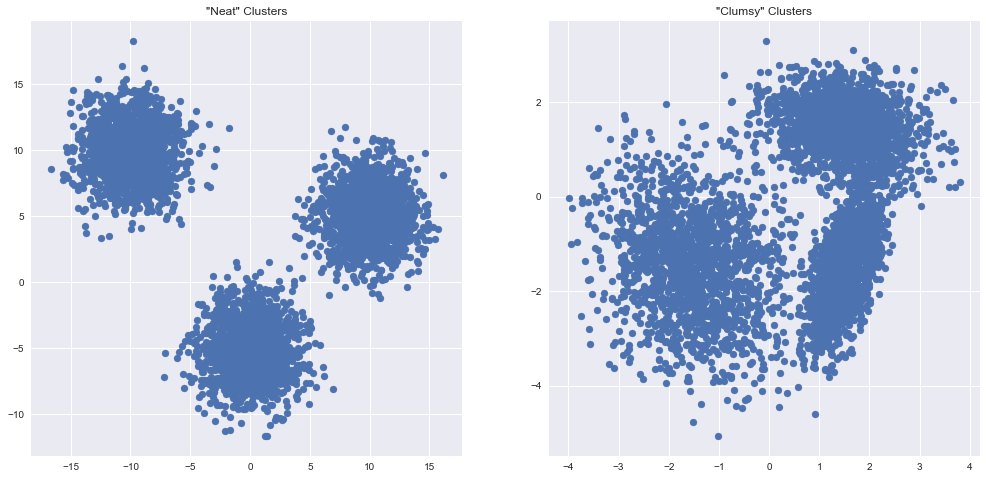

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

#Toy data sets
centers_neat = [(-10, 10), (0, -5), (10, 5)]
x_neat, _ = datasets.make_blobs(n_samples=5000,
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

x_clumsy, _ = datasets.make_classification(n_samples=5000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          shuffle=False,
                                          random_state=301)
#Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

plt.figure(figsize=(17,8))
plt.subplot(121, title='"Neat" Clusters')
plt.scatter(x_neat[:,0], x_neat[:,1])
plt.subplot(122, title='"Clumsy" Clusters')
plt.scatter(x_clumsy[:,0], x_clumsy[:,1])

The data set on the left seems to clearly exhibit three well-defined, spherical clusters while the set on the right is a little more... foggy. Is it three clusters? Maybe two? While a scatter plot allows us to inspect our data for obvious clusters, K-means does not see like we do and will adhere to the algorithm.

Let's see how K-means would cluster the above two data sets:

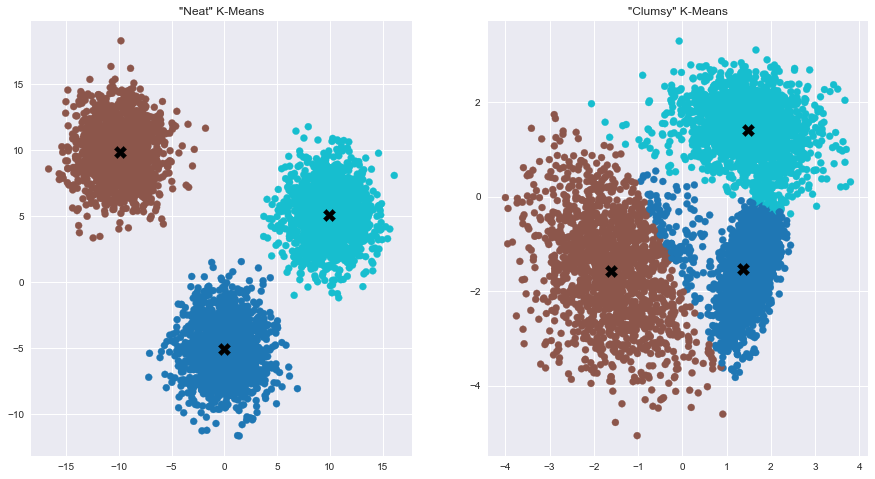

In [2]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_neat_learn = KMeans(n_clusters=3, random_state=2).fit(x_neat)
km_neat = KMeans(n_clusters=3, random_state=2).fit_predict(x_neat)

km_clumsy_learn = KMeans(n_clusters=3, random_state=2).fit(x_clumsy)
km_clumsy = KMeans(n_clusters=3, random_state=2).fit_predict(x_clumsy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" K-Means')
plt.scatter(x_neat[:,0], x_neat[:,1], c=km_neat, cmap=cmap)
plt.scatter(km_neat_learn.cluster_centers_[:,0], km_neat_learn.cluster_centers_[:,1],
            marker='X', s=150, c='black')


plt.subplot(122, title='"Clumsy" K-Means')
plt.scatter(x_clumsy[:,0], x_clumsy[:,1], c=km_clumsy, cmap=cmap)
plt.scatter(km_clumsy_learn.cluster_centers_[:,0], km_clumsy_learn.cluster_centers_[:,1],
            marker='X', s=150, c='black')

Interesting results, to say the least. While the performance on the "neat" data set achieves excellent clustering, our "clumsy" data set — while not that bad — is suboptimal. Visually, we can see two, maybe three, clusters — but K-means creates partitions that don't particularly reflect that. Our clusters are of varying shapes and variances, which proves challenging for K-means to work with.

Let's take a step backward: What makes data "spherical," anyway? Our "neat" clusters are composed of data points that are normally distributed (Gaussian distributed) and isotropic (i.e., the same variance in all dimensions/ directions) across the two dimensions of the plot. Our "clumsy" data is also normally distributed as well, but not isotropic (it's "anisotropic" for you real statistician). Furthermore, the "clumsy" clusters aren't well separated, so K-means has a hard time judging which centroid each data point is nearest to.

Now, while both data sets are artificially made, which one do you think you'd more likely see in real world out there? We need a way of clustering clumsy, messier, noisier data! 

This brings up yet another consideration:what if variances are different in different directions/ dimensions. What if some data points don't belong in any cluster? What if they are outliers or noise?. K-means include every data point in a cluster no matter how far away it is from the nearest centroid.

**Note:** try GMM algorithm for the above datasets and give your comments before proceeding.



In [3]:
# let GMM code and comments come here.

**One more Solution to try: Enter the world of DBSCAN.** 

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Density-based clustering methods are one way of addressing these situations. The most popular method is density-based spatial clustering of applications with noise (DBSCAN), which differs from K-means in a few important ways: 

- DBSCAN does not require the analyst to select the number of clusters a priori — the algorithm determines this based on the parameters it's given.


- It excels at clustering non-spherical data.


- It does not force every data point into a cluster — if a data point lies outside of the specified starting parameters, it will be classified as "noise" and not included in any resulting cluster.


- DBSCAN is somewhat slower than K-Means, but still scales to relatively large datasets.


Rather than randomly initialize centroids within our 2D data set and drift them into the best position, DBSCAN looks at each data point individually. 

DBSCAN relies on two parameters:

- **Epsilon**, or "eps,": A measure of radial distance extending from a data point. A larger epsilon means a larger distance from a data point is considered when determining if another data point should be considered in its "neighborhood" and vice versa.

- **Minimum points**: The number of other data points within a data point's "neighborhood" for it to be considered a "core" data point.

Let's visualize this:

!['ALT TEXT'](https://i.stack.imgur.com/5aikc.png "DBSCAN Image")

The image above shows how DBSCAN parameters work. The circles from each data point represent the epsilon distance. For a data point to be considered "core" and therefore "clusterable," it needs to have the minimum number of data points fall within its epsilon radius (in this example, that number is four including the data point itself). "Border" points are also in the core clusters and form their edges. The blue data point has neither the minimum number of data points in its neighborhood nor does it fall within a core data point's neighborhood and is thus labeled as "noise."



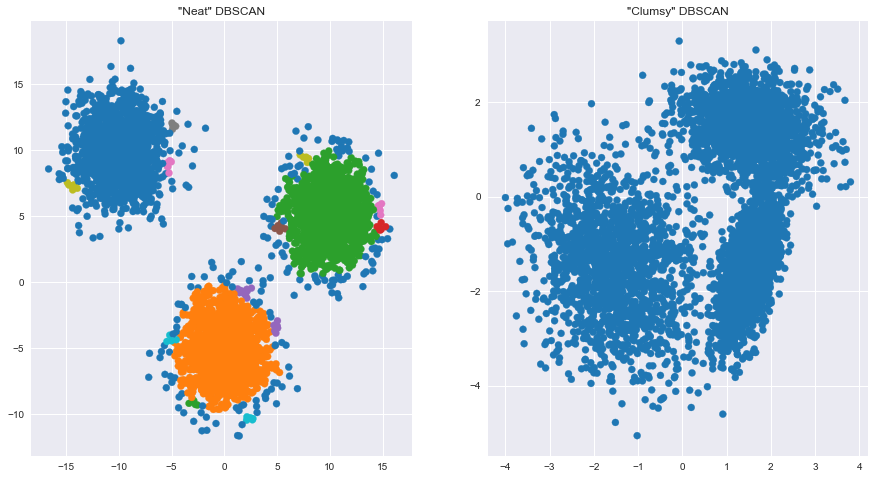

In [4]:
from sklearn.cluster import DBSCAN

#Predict DBSCAN cluster membership
dbscan_neat = DBSCAN().fit_predict(x_neat)
dbscan_clumsy = DBSCAN().fit_predict(x_clumsy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='"Neat" DBSCAN')
plt.scatter(x_neat[:,0], x_neat[:,1], c=dbscan_neat, cmap=cmap)
plt.subplot(122, title='"Clumsy" DBSCAN')
plt.scatter(x_clumsy[:,0], x_clumsy[:,1], c=dbscan_clumsy, cmap=cmap)

In [5]:
print("DBSCAN memberships of dbscan_neat:\n{}".format(dbscan_neat))

DBSCAN memberships of dbscan_neat:
[0 1 2 ... 1 0 2]


In [6]:
print("DBSCAN memberships of dbscan_clumsy:\n{}".format(dbscan_clumsy))

DBSCAN memberships of dbscan_clumsy:
[-1 -1 -1 ... -1 -1 -1]


As you can see , all data points were assigned the label -1, which stands for noise.This is a consequence of the default parameter settings for `eps` and `min_samples` which needs to be tuned.

So keep experimenting.... play around with `eps` and `min_samples`parameters  till you get the right values. Good luck...

A major drawback with DBSCAN is that it's sensitive to the epsilon(`eps`) and minimum points(`min_samples`) parameters we give it. I can attest to this — while writing this article, I tinkered with parameters that differed only marginally but went from finding clusters to finding all noise on the same data set. The difference between setting "eps" at four vs. five could completely stop DBSCAN from working appropriately.

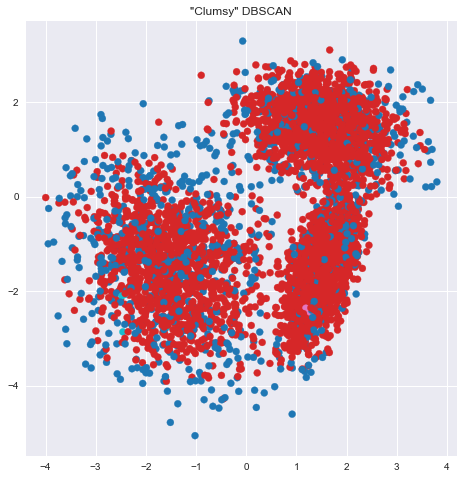

In [7]:


#Predict DBSCAN cluster membership

dbscan = DBSCAN(eps=1.62, min_samples=4).fit(x_clumsy)
dbscan_clumsy01 = dbscan.fit_predict(x_clumsy)

plt.figure(figsize=(17,8))


plt.subplot(122, title='"Clumsy" DBSCAN')
plt.scatter(x_clumsy[:,0], x_clumsy[:,1], c=dbscan_clumsy01, cmap=cmap)

In [8]:
print("DBSCAN memberships of dbscan_clumsy01:\n{}".format(dbscan_clumsy01))

DBSCAN memberships of dbscan_clumsy01:
[0 0 0 ... 0 0 0]


In [9]:
import numpy as np
np.unique(dbscan_clumsy01)

array([-1,  0,  1,  2], dtype=int64)

In [10]:
core_sample_indicies_array = dbscan.core_sample_indices_
core_sample_indicies_array.shape

(3357,)

An evolved version of DBSCAN, called "HDBSCAN" (the H for "hierarchical"), attempts to allow for clusters of differing variances and densities. HDBSCAN really only requires us to provide one parameter: minimum cluster size. Think of it like hierarchical/agglomerative clustering (that other clustering method you may have been taught in stats class): Every data point starts as part of its own cluster and iteratively clusters with the next nearest data points until all data points are clustered together. The minimum cluster size parameter allows us to toss out clusters below this threshold.

It's more intuitive from a business standpoint to determine what size a cluster/segment needs to be in order for it to be considered "actionable" (i.e., you aren't going to create a targeted marketing campaign for five customers but you might for 50,000).

Let's see how HDBSCAN handles our unbalanced/noisy data with a variety of minimum cluster size parameters:

In [11]:
import hdbscan

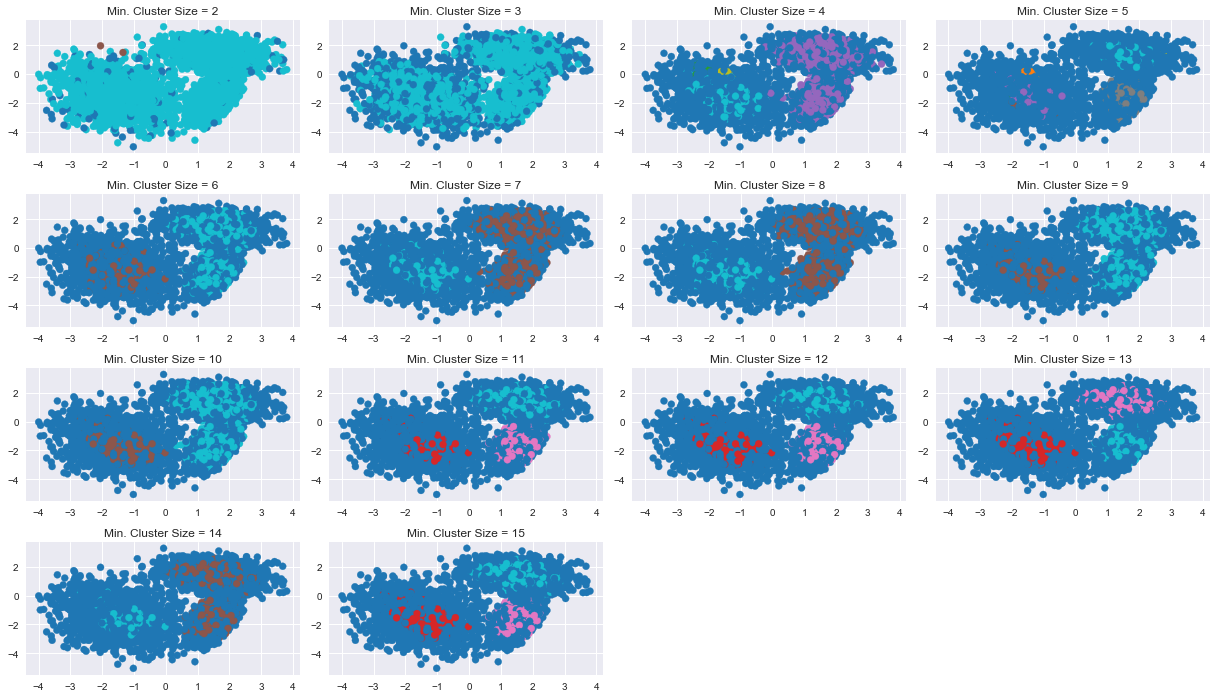

In [12]:
clust_count = np.linspace(1, 20, num=20, dtype='int')

clust_number = 2
plot_number = 1
plt.figure (figsize=(17,12))
while clust_number < 16:
    hdb = hdbscan.HDBSCAN(min_cluster_size=clust_number)
    hdb_pred = hdb.fit(x_clumsy)
    plt.subplot(5, 4, plot_number, title = 'Min. Cluster Size = {}'.format(clust_number))
    plt.scatter(x_clumsy[:,0], x_clumsy[:,1], c=hdb_pred.labels_, cmap=cmap)
    plot_number += 1
    clust_number += 1

plt.tight_layout()

In [13]:
np.unique(hdb_pred.labels_)

array([-1,  0,  1,  2], dtype=int64)

**Note:** Very poor results with hdbscan, most of the data points are classified as noise (blue dots). May need hyper parameter tuning or this algorithm does not suite for this dataset, we need to explore and experiment more....please do that.

**Your comments and exploration results are most welcome.**